In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
import scipy.optimize as optimization
import datetime as dt
from datetime import timedelta
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6
import math
import scipy.stats
import matplotlib.pyplot as plt
import time
from ipywidgets import Checkbox
import pandas_datareader as pdr
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('../../ModernPortfolio_project/DEFINITIONS')

import Rebalancing as reb

In [3]:
df = pd.read_csv('PreparedData_252.csv', index_col='Date')
df.index = pd.to_datetime(df.index)
weights = pd.read_csv('portfolioWeights.csv')
weights.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
n = 252
start = df.index[0]
end = df.index[-1]
tickers = df.columns.values.tolist()

#### 1. Inwestment amount

In [5]:
investmentAmt = 100000

#### 2. Check highest profitale stock and calculate cumulate returns

In [6]:
cum_returns, buyAmt = reb.prepare_data(investmentAmt, df, weights)

Highest profitable stocks is BTC-USD


#### 3. See portfolios on plot

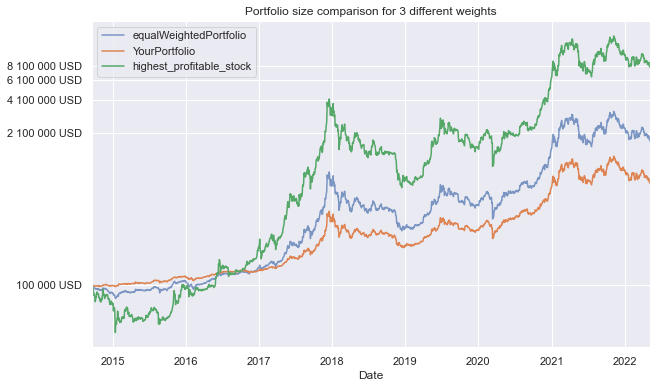

In [7]:
reb.comparePortfolios_Plot(investmentAmt, cum_returns, max_y = 1.2, freq=20);

#### 4. Check proportion of portfolio

In [8]:
proportions = reb.calculate_proportions(cum_returns, df,weights)

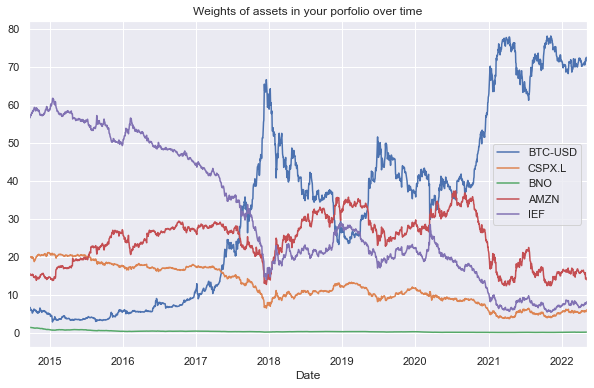

In [9]:
reb.plot_proportions(proportions)

In [10]:
quaterly = Checkbox(description = 'quaterly')
yearly = Checkbox(description = 'yearly')

period = Checkbox(description = 'Over choesen period')
margin = Checkbox(description = 'Over choesen margin')

#### 5. Select rebalancing method

In [11]:
display(period, margin)

Checkbox(value=False, description='Over choesen period')

Checkbox(value=False, description='Over choesen margin')

In [12]:
choesen_method = reb.choese_rebalancing_method(period, margin)

Your choesen frequency: ['Over choesen period']


#### 6. Select next paramiters

In [13]:
selection = reb.display_next_options(choesen_method, quaterly, yearly)

Select frequency of rebalancing:


Checkbox(value=False, description='quaterly')

Checkbox(value=False, description='yearly')

##### 7. Create new balanced portfolio base on your selections

In [14]:
new_proportions, portfolio_value = reb.run_selected_rebalancing_method(choesen_method, weights, buyAmt, cum_returns, proportions, n, quaterly, yearly, df, reb.rebalancing_model_over_period, reb.rebalancing_model_over_margin, selection, reb.calc_portfolio_value_by_date, reb.calc_portfolio_value_by_row, reb.calculate_new_proportions, reb.repair_rebalancing_dates, reb.choese_rebalancing_frquency, reb.create_dates_for_rebalancing)

Your choesen frequency: ['quaterly']
In this period you could make 30 rebalancing


##### 8. See results on the plot

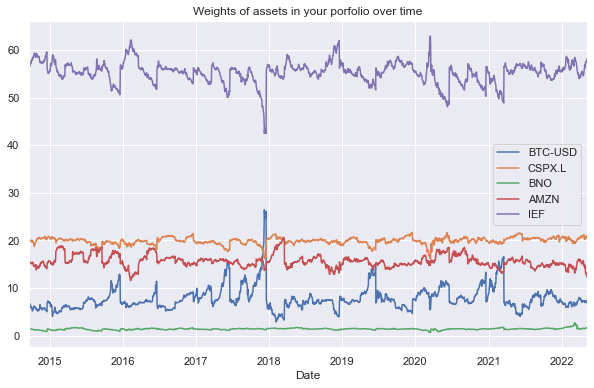

In [15]:
reb.plot_proportions(new_proportions)

In [16]:
freq = 5

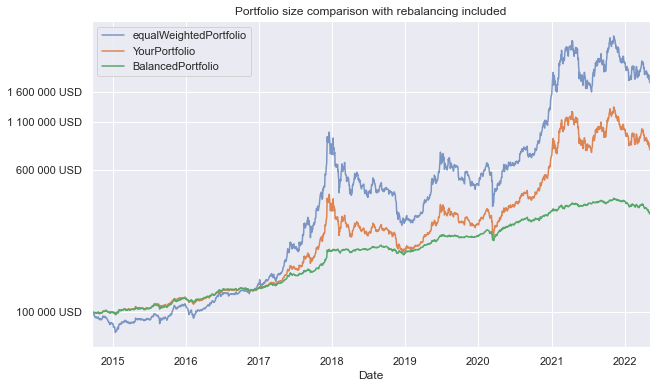

In [17]:
reb.compare_balance_portfolio_vs_previous(investmentAmt, portfolio_value, cum_returns, freq=freq) 

In [18]:
portfolio_value.to_csv('portfolio_value.csv', header=True)

In [19]:
cum_returns.to_csv('cum_returns.csv', header=True)